In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [8]:
# Importing the dataset
dataset = pd.read_csv('possum.csv')
print(dataset.head())
print(dataset.describe())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    

In [12]:
# Describing the data
print(dataset.shape)
#----------------------------------------------
print(dataset.info())
#----------------------------------------------
print(dataset.describe())
#----------------------------------------------

(104, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB
None
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000 

In [13]:
row_with_missing_values = dataset[dataset.isna().any(axis=1)]
print(row_with_missing_values)
null_vals = dataset.isnull().sum()

    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
40    41     2  Vic   f  5.0     88.4    57.0      83.0   36.5       NaN   
43    44     2  Vic   m  NaN     85.1    51.5      76.0   35.5      70.3   
45    46     2  Vic   m  NaN     91.4    54.4      84.0   35.0      72.8   

    earconch   eye  chest  belly  
40      40.3  15.9   27.0   30.5  
43      52.6  14.4   23.0   27.0  
45      51.2  14.4   24.5   35.0  


In [14]:
dataset_clean = dataset.drop([40, 43, 45])
dataset_clean.drop('case', axis = 1, inplace = True)
#dataset_clean.drop('Pop', axis = 1, inplace = True)
dataset_clean.reset_index(drop = True, inplace = True)
check_nulls = dataset_clean[dataset_clean.isna().any(axis=1)]
print(check_nulls)

Empty DataFrame
Columns: [site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []


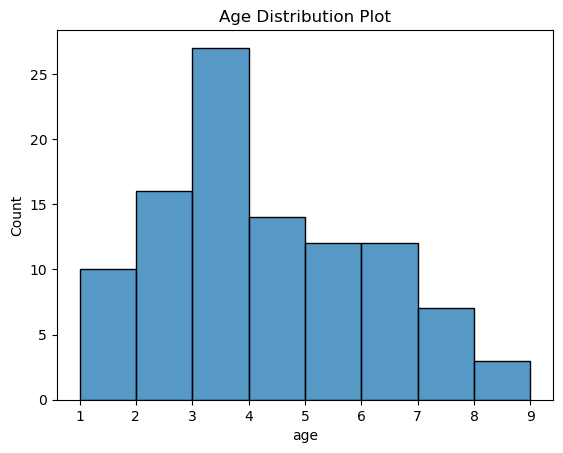

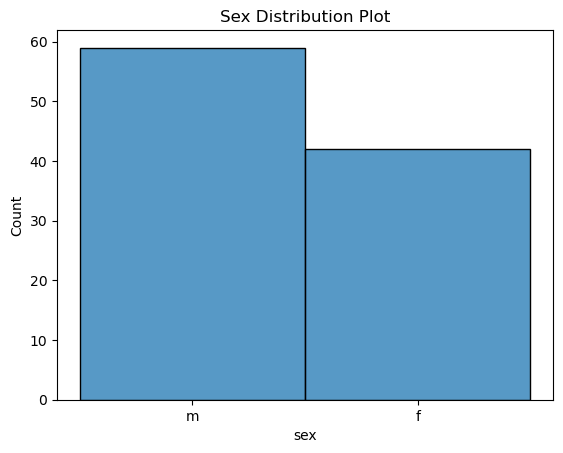

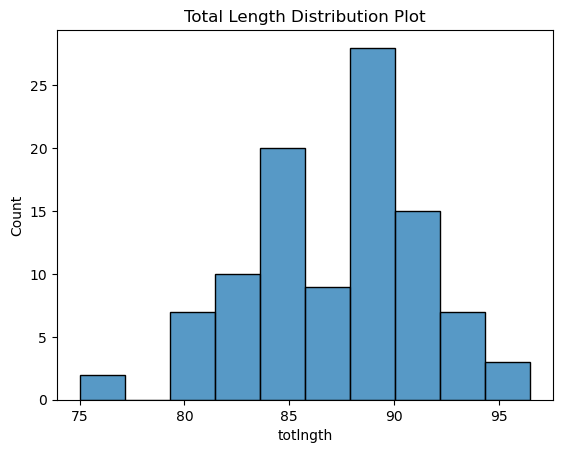

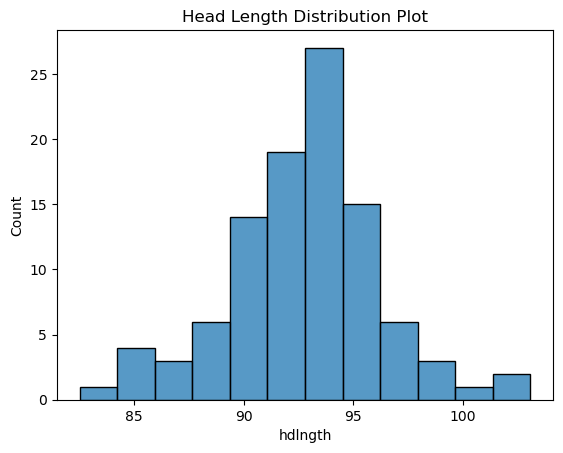

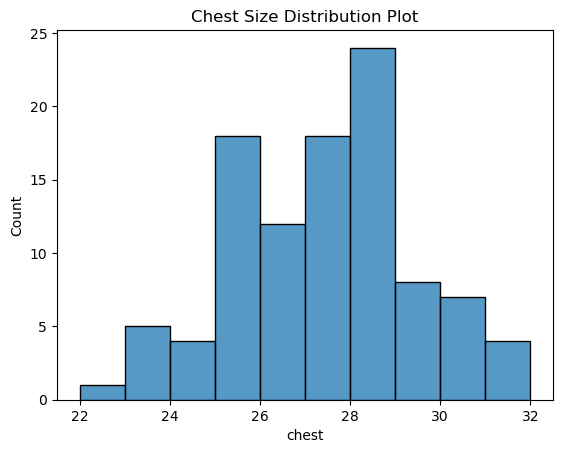

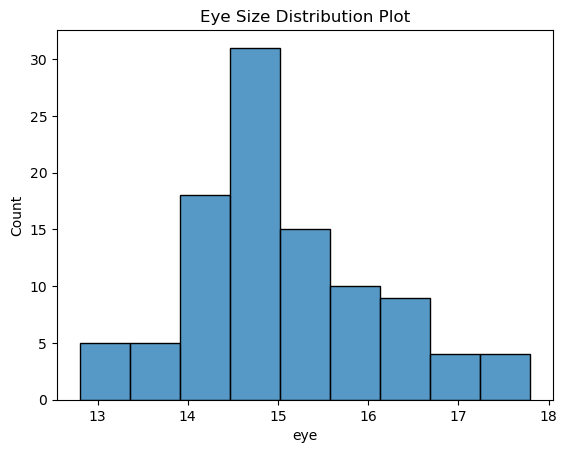

In [17]:
#Showing distributions in histrograms
plt.title('Age Distribution Plot')
sns.histplot(dataset_clean['age'])
plt.show()
#-----------------------------------
plt.title('Sex Distribution Plot')
sns.histplot(dataset_clean['sex'])
plt.show()
#-----------------------------------
plt.title('Total Length Distribution Plot')
sns.histplot(dataset_clean['totlngth'])
plt.show()
#-----------------------------------
plt.title('Head Length Distribution Plot')
sns.histplot(dataset_clean['hdlngth'])
plt.show()
#-----------------------------------
plt.title('Chest Size Distribution Plot')
sns.histplot(dataset_clean['chest'])
plt.show()
#---------------------------------
plt.title('Eye Size Distribution Plot')
sns.histplot(dataset_clean['eye'])
plt.show()

In [19]:
#Finding any duplicates within dataset.clean
print(dataset_clean.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool


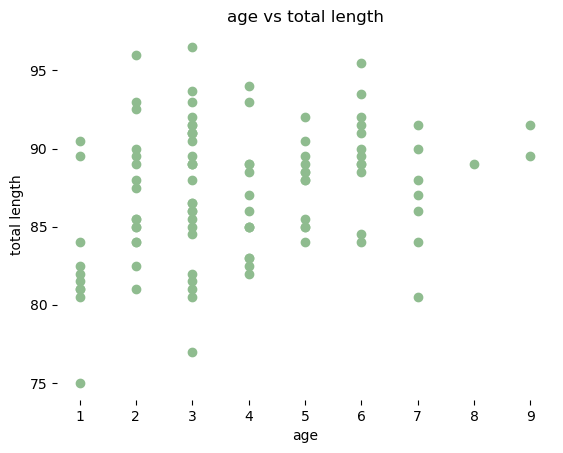

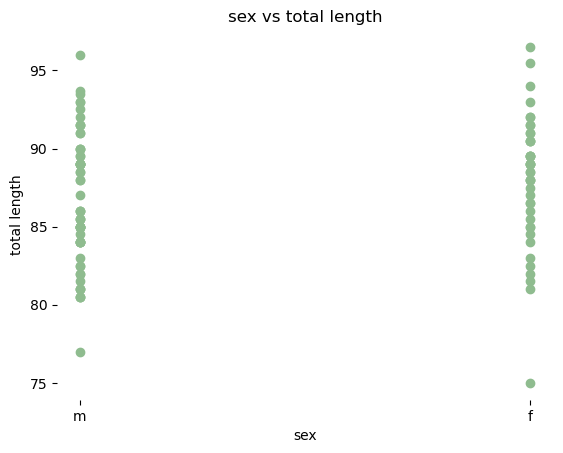

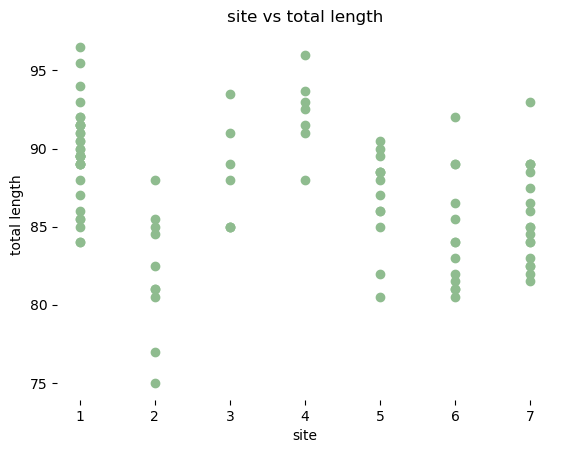

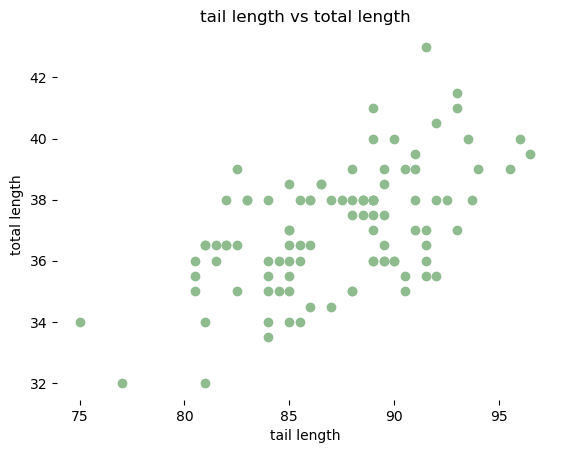

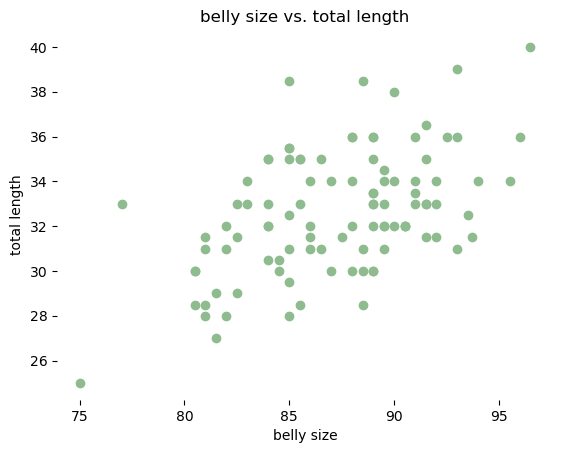

In [21]:
plt.scatter(dataset_clean['age'], dataset_clean['totlngth'], color = 'darkseagreen')
plt.title('age vs total length')
plt.xlabel('age')
plt.ylabel('total length')
plt.box(False)
plt.show()
#-----------------------------------
plt.scatter(dataset_clean['sex'], dataset_clean['totlngth'], color = 'darkseagreen')
plt.title('sex vs total length')
plt.xlabel('sex')
plt.ylabel('total length')
plt.box(False)
plt.show()
#-----------------------------------
plt.scatter(dataset_clean['site'], dataset_clean['totlngth'], color = 'darkseagreen')
plt.title('site vs total length')
plt.xlabel('site')
plt.ylabel('total length')
plt.box(False)
plt.show()
#-----------------------------------
plt.scatter(dataset_clean['totlngth'], dataset_clean['taill'], color = 'darkseagreen')
plt.title('tail length vs total length')
plt.xlabel('tail length')
plt.ylabel('total length')
plt.box(False)
plt.show()
#---------------------------------
plt.scatter(dataset_clean['totlngth'], dataset_clean['belly'], color = 'darkseagreen')
plt.title('belly size vs. total length')
plt.xlabel('belly size')
plt.ylabel('total length')
plt.box(False)
plt.show()

In [25]:
x = dataset_clean.iloc[:, :-2].values
y = dataset_clean.iloc[:, -2].values
print(x)
print('=========================================')
print(y)

[[1 'Vic' 'm' ... 74.5 54.5 15.2]
 [1 'Vic' 'f' ... 72.5 51.2 16.0]
 [1 'Vic' 'f' ... 75.4 51.9 15.5]
 ...
 [7 'other' 'f' ... 63.5 45.4 13.0]
 [7 'other' 'm' ... 62.9 45.9 15.4]
 [7 'other' 'f' ... 67.6 46.0 14.8]]
[28.  28.5 30.  28.  28.5 30.  30.  29.  28.  27.5 31.  28.  27.  28.
 28.  28.  29.  28.  28.  27.  30.  28.  28.  27.  31.  29.  23.  27.
 24.  24.5 27.  28.  24.  26.  28.  25.5 28.  27.  25.  27.  25.5 29.
 27.  25.  28.  29.5 28.  28.  28.5 26.  30.  30.5 27.5 31.  30.5 32.
 26.  26.5 27.  25.5 25.5 29.  26.5 27.5 27.  28.5 27.  27.5 25.5 23.5
 26.  26.  26.  25.  23.  22.  23.5 27.5 26.  25.  25.  27.  26.  26.
 25.5 29.  25.5 26.  25.5 24.  29.  27.  25.  25.  28.5 28.  23.  25.
 25.  25.  28.5]


In [26]:
ct = ColumnTransformer(transformers=[('encoder_1', OneHotEncoder(),[1]), ('encoder_2', OneHotEncoder(),[2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 74.5 54.5 15.2]
 [1.0 0.0 1.0 ... 72.5 51.2 16.0]
 [1.0 0.0 1.0 ... 75.4 51.9 15.5]
 ...
 [0.0 1.0 1.0 ... 63.5 45.4 13.0]
 [0.0 1.0 0.0 ... 62.9 45.9 15.4]
 [0.0 1.0 1.0 ... 67.6 46.0 14.8]]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 3)

In [28]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(type(regressor))
print(regressor.score(x_train, y_train))

<class 'sklearn.linear_model._base.LinearRegression'>
0.7179735444498204


In [29]:
y_pred = regressor.predict(x_test)

In [31]:
np.set_printoptions(precision=5)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(result)
print('---------------------------')
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')


[[33.52983 28.5    ]
 [23.71599 25.5    ]
 [28.26334 30.     ]
 [25.92472 28.5    ]
 [26.58058 25.     ]
 [27.78666 25.5    ]
 [25.14256 25.     ]
 [25.75125 27.     ]
 [28.10087 29.     ]
 [27.28297 28.     ]
 [24.94483 26.     ]
 [28.22838 27.5    ]
 [24.05962 25.     ]
 [27.33083 25.     ]
 [26.31561 28.     ]
 [23.4071  23.5    ]
 [25.19679 26.     ]
 [25.0428  27.     ]
 [26.21386 25.5    ]
 [26.60565 29.5    ]
 [24.60784 25.     ]
 [29.76562 27.     ]
 [28.09842 28.     ]
 [26.08152 28.5    ]
 [24.42404 25.     ]
 [27.75158 26.     ]
 [25.71054 28.     ]
 [29.30113 26.     ]
 [26.66638 28.     ]
 [29.20525 30.     ]
 [26.1835  27.     ]
 [26.24068 30.     ]
 [27.75043 28.     ]
 [28.35515 28.     ]
 [25.42184 24.     ]
 [27.91293 28.     ]
 [28.18513 27.     ]
 [26.05809 25.5    ]
 [26.19771 24.     ]
 [24.87718 25.5    ]
 [32.60483 29.     ]
 [27.05134 27.     ]
 [29.84669 25.5    ]
 [26.23689 28.     ]
 [23.3088  26.     ]
 [27.06766 27.     ]
 [26.16999 27.     ]
 [26.31966 27